## Cluster confusion matrix

In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
K = 7

cx_name = ['None', 'interstitial lung disease', 'Renal compromise', 'Malignancy of lung', 'PAH', 'Lymphoma', 'Thrombocytopenia']
group_name = [str(i) for i in range(K)]

In [24]:
cluster = np.array([
    [49.0, 9332.0, 16442.0, 13533.0, 11187.0, 6133.0, 14738.0],
    [2.0, 323.0, 378.0, 301.0, 137.0, 389.0, 212.0],
    [464.0, 931.0, 1536.0, 614.0, 341.0, 1053.0, 1055.0],
    [0.0, 62.0, 74.0, 37.0, 15.0, 143.0, 19.0],
    [3.0, 72.0, 94.0, 32.0, 13.0, 73.0, 51.0],
    [2.0, 72.0, 62.0, 60.0, 54.0, 82.0, 6.0],
    [0.0, 239.0, 490.0, 217.0, 160.0, 160.0, 298.0]
]).astype(float)

print(np.sum(cluster, axis=0))

cluster_by_group = cluster / cluster.sum(axis=1, keepdims=True)
cluster_by_cx = cluster / cluster.sum(axis=0, keepdims=True)

cluster_by_group

[  520. 11031. 19076. 14794. 11907.  8033. 16379.]


array([[0.00068614, 0.13067466, 0.23023497, 0.18950066, 0.15664996,
        0.08587952, 0.2063741 ],
       [0.00114811, 0.18541906, 0.21699196, 0.1727899 , 0.07864524,
        0.22330654, 0.1216992 ],
       [0.07741074, 0.15532199, 0.25625626, 0.10243577, 0.05689022,
        0.17567568, 0.17600934],
       [0.        , 0.17714286, 0.21142857, 0.10571429, 0.04285714,
        0.40857143, 0.05428571],
       [0.00887574, 0.21301775, 0.27810651, 0.09467456, 0.03846154,
        0.21597633, 0.15088757],
       [0.00591716, 0.21301775, 0.18343195, 0.17751479, 0.15976331,
        0.24260355, 0.01775148],
       [0.        , 0.1528133 , 0.31329923, 0.1387468 , 0.10230179,
        0.10230179, 0.19053708]])

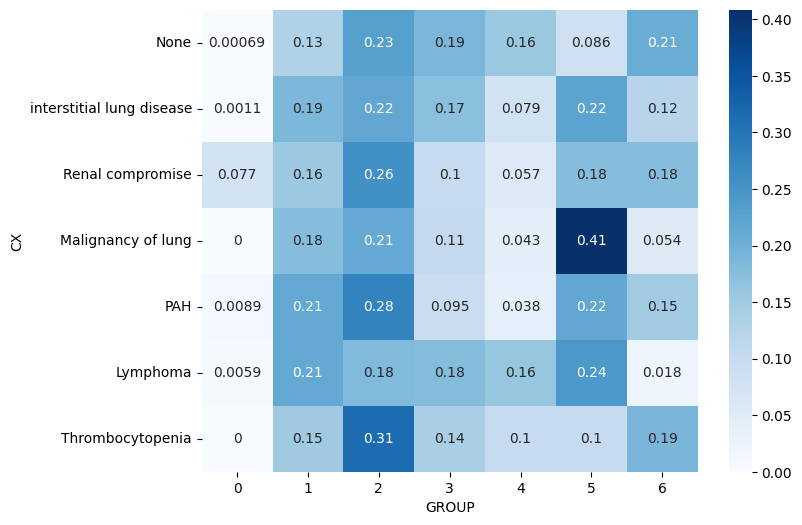

In [5]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cluster_by_group, annot=True, cmap='Blues', cbar=True, xticklabels=group_name, yticklabels=cx_name)

ax.set_xlabel('GROUP')
ax.set_ylabel('CX')

plt.show()

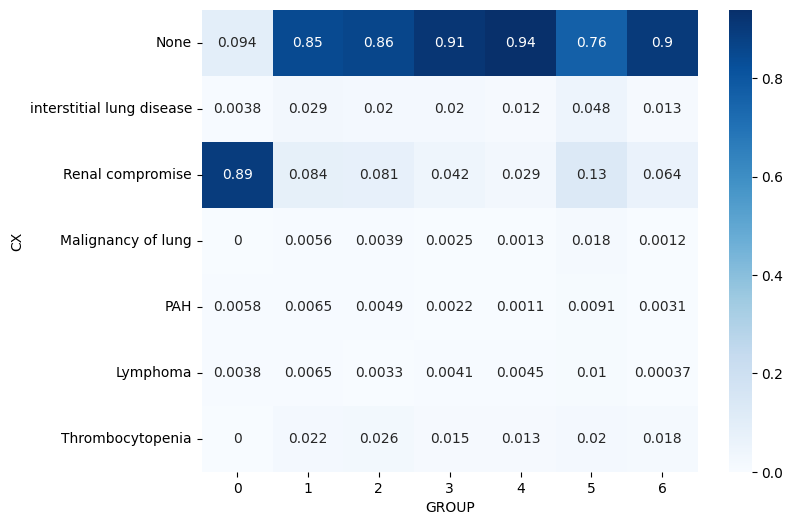

In [6]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cluster_by_cx, annot=True, cmap='Blues', cbar=True, xticklabels=group_name, yticklabels=cx_name)

ax.set_xlabel('GROUP')
ax.set_ylabel('CX')

plt.show()

## Interactive TSNE trajectory plot

In [7]:
from sklearn.manifold import TSNE

In [8]:
x_corpus = np.load('../temp_model/[RD74--TE__pp_single_mark-concat-d1]/data/x_corpus.npz')['arr_0']
idcode = np.load('../temp_model/[RD74--TE__pp_single_mark-concat-d1]/data/idcode.npz')['arr_0']
label = np.load('../temp_model/[RD74--TE__pp_single_mark-concat-d1]/data/cluster.npz')['arr_0']

In [9]:
np.max(idcode)

11075.0

In [22]:
IDCODE = 1234
label[idcode == IDCODE]

array([2., 2., 2., 2., 2., 2., 2., 6.])

Text(0, 0.5, 't-SNE component 2')

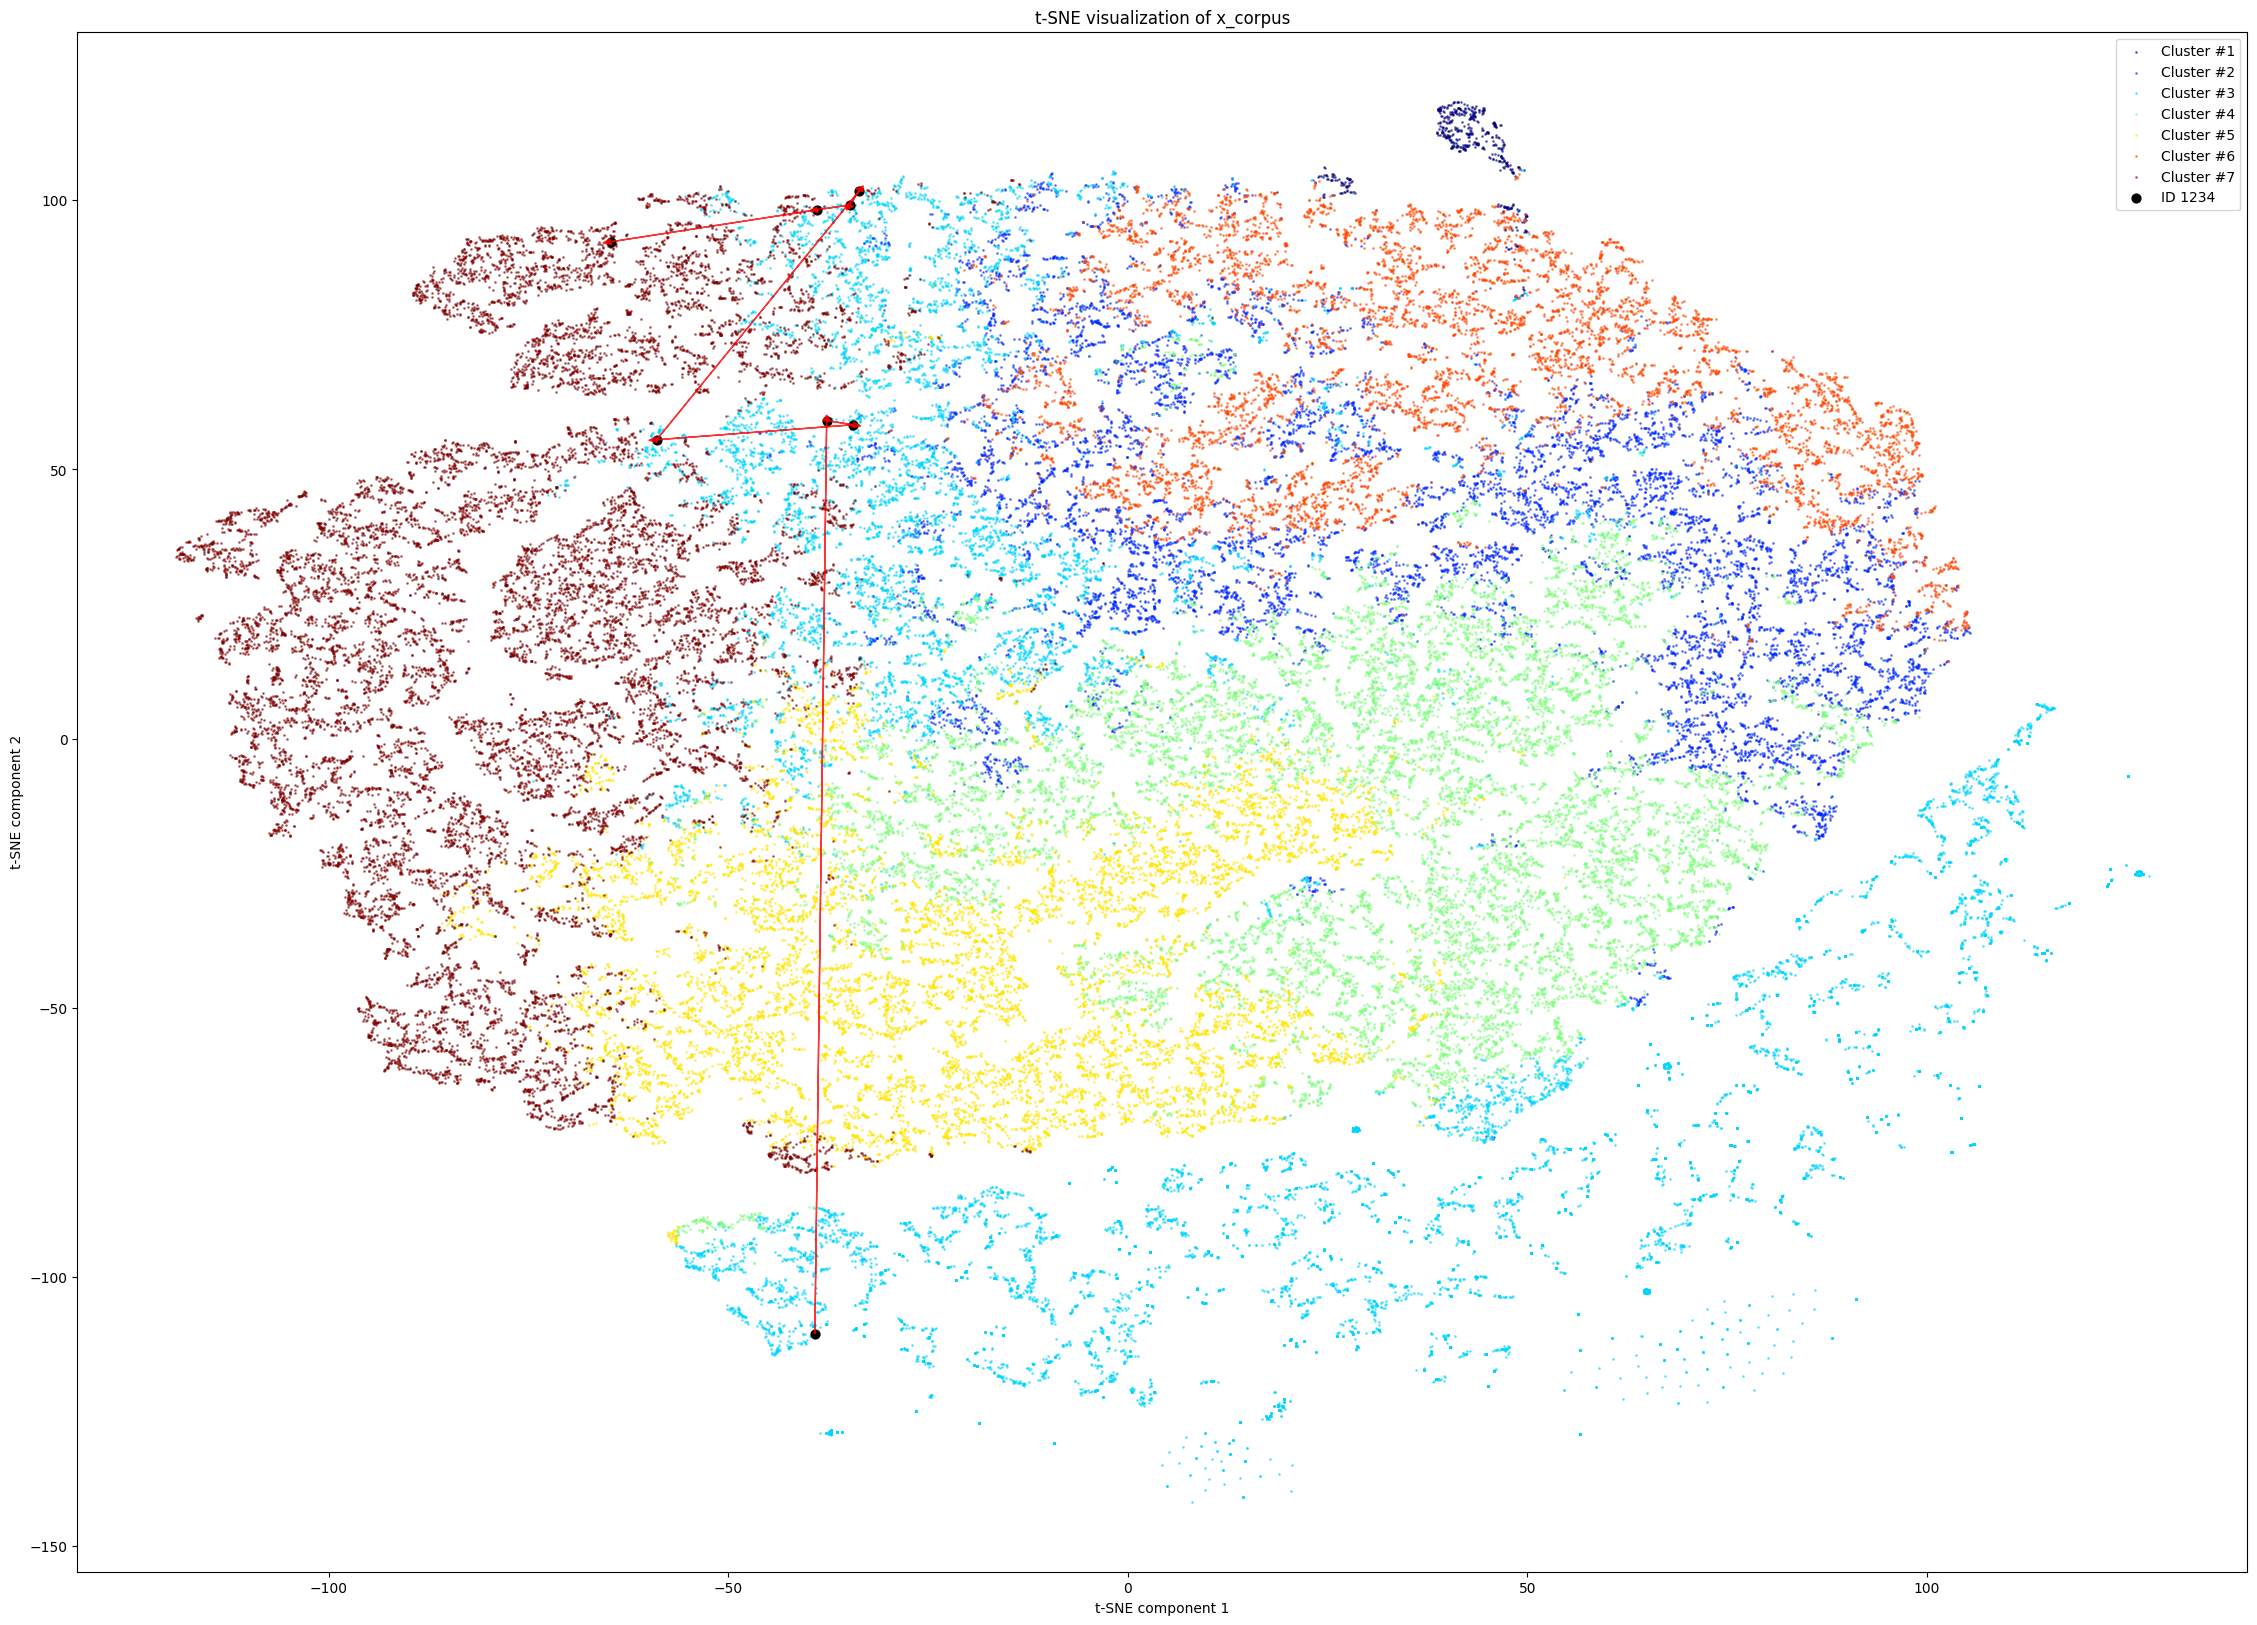

In [23]:
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x_corpus)

plt.figure(figsize=(28, 20))

cx_name = [f"Cluster #{i}" for i in range(1, 8)]

unique_labels = np.unique(label)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))

for i, unique_label in enumerate(unique_labels):
    plt.scatter(x_tsne[label == unique_label, 0], x_tsne[label == unique_label, 1], 
                color=colors[i], label=f'{cx_name[i]}', alpha=0.5, s=1)
    
highlight_points = x_tsne[idcode == IDCODE]
plt.scatter(highlight_points[:, 0], highlight_points[:, 1], color='black', label=f'ID {IDCODE}', alpha=1, s=40)

highlight_indices = np.where(idcode == IDCODE)[0]
for i in range(len(highlight_indices) - 1):
    start_idx = highlight_indices[i]
    end_idx = highlight_indices[i + 1]
    plt.arrow(x_tsne[start_idx, 0], x_tsne[start_idx, 1], 
              x_tsne[end_idx, 0] - x_tsne[start_idx, 0], 
              x_tsne[end_idx, 1] - x_tsne[start_idx, 1], 
              color='red', alpha=0.8, head_width=1, head_length=1)

plt.legend()
plt.title('t-SNE visualization of x_corpus')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')